## Representación de datos en una base ortonormal

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

#### datos
def datos(n):
    np.random.seed(42)
    xs = np.random.randn(n)
    ys = (1/4) * np.random.randn(n)
    D = np.c_[xs, ys]
    R45 = np.array([[np.cos(-np.pi/4), -np.sin(-np.pi/4)],
                    [np.sin(-np.pi/4),  np.cos(-np.pi/4)]])
    D_rotated = np.dot(D, R45)
    return D_rotated

Data = datos(20)

### recta inducida por un vector unitario

def unitario(theta):
    return np.array([np.cos(theta), np.sin(theta)]).reshape(-1, 1)

def dibuja_recta(theta):
    extremos = np.c_[2*unitario(theta), -2*unitario(theta)]
    plt.plot(extremos[0], extremos[1])

def matriz_proy(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[c ** 2, c * s],
                     [c * s, s ** 2]])
                     
def dibuja_perpendiculares(Data, theta):
    Data_p = np.dot(Data, matriz_proy(theta))
    for i in range(len(Data)):
        segmento = np.vstack([Data[i], Data_p[i]])
        plt.plot(segmento[:, 0], segmento[:, 1], 'b--')
    
def representacion(theta=0):
    dibuja_recta(theta)
    plt.plot(Data[:, 0], Data[:, 1], 'o')
    Data_p = np.dot(Data, matriz_proy(theta))
    plt.plot(Data_p[:, 0], Data_p[:, 1], 'ro')
    plt.axis('equal')
    plt.axis([-2,2, -2, 2])
    dibuja_perpendiculares(Data, theta)

    
interact(representacion, theta=(0.0, 2 * np.pi))


interactive(children=(FloatSlider(value=0.0, description='theta', max=6.283185307179586), Output()), _dom_clas…

<function __main__.representacion(theta=0)>

**Autovectores en algunos problemas de optimización**

Un problema frecuente en Machine Learning es el de optimizar $\overline{x} ^{T}A\overline{x} $ donde $\overline{x}$ es unitario y $A _{d\times d} $ es simétrica. Ese tipo de problemas surgen en ejercicios de reducción de dimensionalidad e ingeniería de atributos.

\begin{equation*}
\begin{aligned}
& \underset{\overline{x} }{\text{Optimize}}
& & \overline{x} ^{T}A \overline{x}    \\
& \text{sujeto a}
& & \| \overline{x}\| ^{ 2} = 1
\end{aligned}
\end{equation*}

Sean $\overline{v} _{ 1}  \ldots \overline{v} _{ d} $ una base ortonormal de autovectores para la matriz simétrica $A _{d\times d} $ ($A v _{ i} =\lambda _{ i} v _{ i}, \ i=1,\ldots d $), así que cualquier $\overline{x}$ puede expresarse como $$\overline{x} = \displaystyle \sum _{ i=1} ^{ d} \alpha _{ i} \overline{v} _{ i}   $$

Reformulando el problema de optimización en términos de los parámetros $\alpha$'s, se tiene:
\begin{equation*}
\begin{aligned}
& \underset{\alpha _{ 1} \ldots \alpha _{ d}  }{\text{Optimize}}
& & \displaystyle \sum _{ i=1} ^{d} \lambda _{ i} \alpha _{ i} ^{ 2}       \\
& \text{sujeto a}
& & \sum _{ i=1} ^{d}  \alpha _{ i} ^{ 2}=1
\end{aligned}
\end{equation*}

El máximo es el mayor de los autovalores y se tiene al tomar el correspondiente $\alpha$ igual a $1$ (los demás, cero).
El mínimo es el menor de los autovalores y se tiene al tomar el correspondiente $\alpha$ igual a $1$ (los demás, cero). 

Al volver al problema original, el máximo es obtenido al tomar $\overline{x}$ como el autovector asociado al mayor autovalor. (Análoga síntesis se recupera para el problema de minimización).


El problema se puede generalizar.

\begin{equation*}
\begin{aligned}
& \underset{\overline{x} _{ 1} \ldots \overline{x} _{ d}  }{\text{Optimize}}
& & \displaystyle \sum _{i=1} ^{ k}   \overline{x} _{ i}  ^{T}A \overline{x} _{ i}     \\
& \text{sujeto a}
& & \| \overline{x} _{ i} \| ^{ 2} = 1 \ \ \forall i \in \{1 \ldots k\}, \ 
& & \overline{x} _{ i} \cdot \overline{x} _{j } = 0, \ \forall i \neq j \\
\end{aligned}
\end{equation*}

En cuyo caso el máximo se alcanza al tomar los autovectores asociados a los $k$ autovalores mayores.


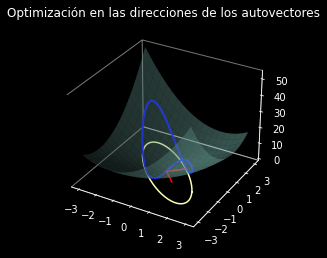

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols

x, y = symbols('x y')
X = np.array([x, y]).reshape(-1, 1)
A = np.array([[2, -1],
              [-1, 2]])

X1 = np.linalg.eig(A)[1].T[0]
X2 = np.linalg.eig(A)[1].T[1]


forma = np.dot(X.T, np.dot(A, X))[0, 0]

def L(xx, yy):
    return float((forma.subs(x, xx)).subs(y, yy))


xx, yy = np.linspace(-3, 3, 20), np.linspace(-3, 3, 20)
x0s, y0s = np.meshgrid(xx, yy)
XX = np.c_[x0s.ravel(), y0s.ravel()]
z0s = np.array([L(XX[i][0], XX[i][1]) for i in range(len(XX))])
z0s = z0s.reshape(x0s.shape)



theta = np.linspace(0, 2 * np.pi)
xe = np.cos(theta)
ye = np.sin(theta)
X_circ = np.c_[xe, ye]
X_elip = np.dot(X_circ, A)
Z_elip = np.array([L(X_elip[i, 0], X_elip[i, 1]) for i in range(len(X_elip))])


plt.style.use("dark_background")
fig, ax = plt.subplots(1, subplot_kw={'projection':'3d'})

ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.plot_surface(x0s, y0s, z0s, alpha=0.4)
ax.plot(X_elip[:, 0], X_elip[:, 1], np.zeros_like(X_elip[:, 0]))
ax.plot(X_elip[:, 0], X_elip[:, 1], Z_elip, color='blue', linewidth=2)
ax.plot([0, X1[0]], [0, X1[1]], [0,0], color='red')
ax.plot([0, X2[0]], [0, X2[1]], [0,0], color='red')
ax.set_title('Optimización en las direcciones de los autovectores')
plt.show()


## Perspectiva de optimización 

Algunas veces se quiere factorizar una matriz imponiendo condiciones sobre los factores. Una condición habitual es
la de factores no negativos y dado que los vectores no negativos no constituyen un espacio vectorial, entonces no se
pueden aplicar los principios del álgebra lineal. Es allí donde la perspectiva de la optimización es importante. Además permitirá
crear síntesis como:

*El SVD truncado prevee la mejor aproximación en términos de error cuadrático en el contexto de las matrices de rango $k$*.

Aunque el problema de factorización se enfrenta como un problema de optimización, se verá que una de las soluciones óptimas
involucra factores cuyas columnas presentan el fenómenos de ortogonalidad.

### Formulación desde la maximización

Si las columnas de $V$ tienen la cualidad de ortonormalidad, entonces la representación reducidad de los datos $D$ es
obtenda como $U=DV$. El problema de optimización se formula, tratando de maximizar la energía de $U=DV$.

\begin{equation*}
\begin{aligned}
& \underset{V _{d\times k} }{\text{maximize}}
& & \|DV\| _{F} ^{ 2}   \\
& \text{sujeto a}
& & V ^{T}V = I _{k }
\end{aligned}
\end{equation*}

Si $\overline{V} _{r} $ es la r-ésima columna de $V$, note que
$$\|DV\| _{F} ^{ 2} = \displaystyle \sum _{r=1} ^{ k}  \|D \overline{V} _{r}\| _{F} ^{ 2}
= \sum _{r=1} ^{ k} \overline{V} _{r}^{T} D ^{T}D \overline{V} _{r}   $$
Luego el problema de optimización se resuelve al tomar a las columnas de $V$ como los autovectores asociales a los autovalores mayores de la matriz $D ^{T}D $ 

### Formulación con residuos

Otra alternativa es minimizar la pérdida de energía, la cual es: $\|D-UV ^{T} \| _{F} ^{ 2}  $. Se propone considerar el problema de optimización (en general no convexo) sin constricciones de ortogonalidad sobre las columnas de $V$, en donde $U$ y $V$ son de orden $n\times k$ y $d\times k$ respectivamente.

\begin{equation*}
\begin{aligned}
& \underset{U,\ V }{\text{minimize}}
& & \|D-UV ^{T} \| _{F} ^{ 2}   \\
\end{aligned}
\end{equation*}

Aunque el problema no se plantea imponiendo condiciones de ortogonalidad, siempre se puede encontrar una solución óptima para la cual las columnas de $V$ satisfacen la cualidad de ortonormalidad.

Si $(U, V)=(U ^{0}, V ^{0})$ es solución, entonces $(U ^{0}R ^{T}, Q)$ también es solución al tomar $V ^{0}=QR$ (QR-descomposición de $V ^{0}$. Ambos pares de soluciones tienen el mismo valor en la función objetivo. 

Se puede probar que la descomposición truncada de valores singulares provee una solución óptima para el problema de factorización via minimización sin constricciones.

# PCA

En los siguientes párrafos se pretende reconocer el siguiente fenómeno:

*PCA ejecuta exáctamente la misma reducción dimensional que SVD sobre datos centrados*

En PCA, primero se centran los datos restando el vector promedio
$\overline{\mu} _{1\times d} $ de cada una de las filas de la matriz de datos
$D$ y se puede lograr usando el vector $\overline{1} _{n\times 1} $, así:

$$M = D - \overline{1} \overline{\mu}$$ 

Luego se calcula la matriz de covarianza: 

$$C _{d\times d}  = \frac{1}{n}M ^{T}M $$ 
La entrada $ij$-ésima de $C$ es la covarianza entre los atributos $i$ y $j$. Dicha matriz
es semidefinida positiva y puede ser aproximada por diagonalización ortogonal 

$$C \approx V \Delta V ^{T} $$ 

Donde $V _{d\times k} $ contiene en sus columnas los top-$k$ autovectores y 
$\Delta$ es diagonal conteniendo a los top-$k$ autovalores no negativos. Por otro lado,
al tomar $U$ como la representación $k$-dimensional de los datos ($U=MV$), se tiene:

1) El promedio en cada nueva atributo en $U$ es cero, dado que $\overline{1}U = 
\overline{1}[MV] = [\overline{1}M]V = \overline{0}V$.

2) La matriz de covarianza de $U$ es la matriz diagonal $\Delta$.

3) La varianza retenida en la reducción dimensional es $\sum _{ i} ^{ k} \lambda _{ i} ^{ 2} $.

Se puede reconstruir una aproximación de los datos usando el vector promedio:

$$D \approx D _{pca} = UV ^{T} + \overline{1}\overline{\mu}  $$ 

Se puede probar que la precisión alcanzada con PCA es cuando menos tan buena como la alcanzada con SVD para el mismo número de autovectores.

Si $D _{ n\times d} $ tiene aproximaciones truncadas $D _{pca} $ y $D _{svd} $, entonces $$\|D - D _{pca} \| _{F} ^{ 2} \leq \|D - D _{svd} \| _{F} ^{ 2}  $$    

Para datos centrados, la precisión de los dos métodos es idéntica.


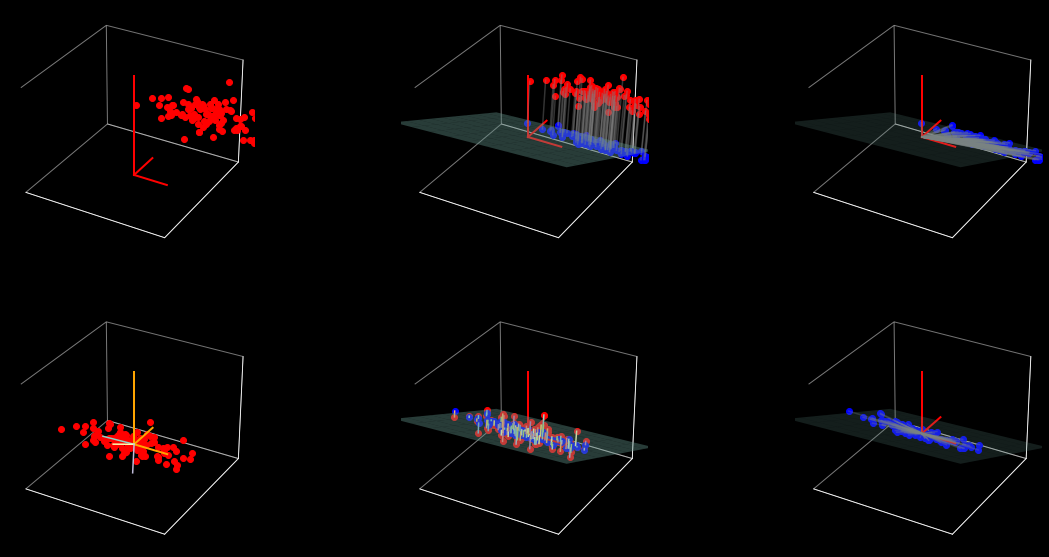

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def matriz_proy(a, b, c):
    u = np.array([a, b, c]).reshape(-1, 1)
    P_u = (1/np.dot(u.T, u)) * np.dot(u, u.T)
    return np.eye(3) - P_u

def escenario():
    ax = plt.gca()
    ax.grid(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.axis([-20, 20, -20, 20])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

def dibuja_plano(a, b, c, **kwargs):
    xs = np.linspace(-25, 25, 10)
    ys = np.linspace(-25, 25, 10)
    x, y = np.meshgrid(xs, ys)
    z = (-a/c)*x + (-b/c)*y
    ax = plt.gca()
    ax.plot_surface(x, y, z, **kwargs)

def dibuja_datos(D, color='red'):
    ax = plt.gca()
    ax.plot(D[:, 0], D[:, 1], D[:, 2], 'o', color=color)

def dibuja_segmentos(D_init, D_end, **kwargs):
    ax = plt.gca()
    for X1, X2 in zip(D_init, D_end):
        ax.plot([X1[0], X2[0]], [X1[1], X2[1]], [X1[2], X2[2]], **kwargs)

def dibuja_ejes(longitud, **kwargs):
    D_end = longitud * np.eye(3)
    D_init = np.zeros_like(D_end)
    ax = plt.gca()
    dibuja_segmentos(D_init, D_end, **kwargs)

def crea_datos(n_samples, mu_mean, w_normal):
    """n_samles: int
       mu_mean: array (3,1) promedio datos
       w_normal: array (3,1) vector normal al plano"""
    a, b, c = w_normal[0], w_normal[1], w_normal[2]
    np.random.seed(42)
    xs = 9 * np.random.randn(n_samples)
    ys = 3 * np.random.randn(n_samples)
    hs = np.random.randn(n_samples)
    zs = (-a/c)*xs + (-b/c)*ys + hs
    Uno = np.ones_like(xs).reshape(-1, 1)
    matriz_mean = np.dot(Uno, mu_mean.T)
    return np.c_[xs, ys, zs] + matriz_mean


plt.style.use("dark_background")


a, b, c = 0, 0.2, 1
n_samples = 100
mu = np.array([15, 15, 5]).reshape(-1, 1)
cero = np.zeros_like(mu)
w = np.array([a, b, c]).reshape(-1, 1)
D = crea_datos(n_samples, mu, w)
D_proy = np.dot(D, matriz_proy(a, b, c))
Origen_like_D = np.zeros_like(D)
D_pca = crea_datos(n_samples, cero, w)
D_pca_proy = np.dot(D_pca, matriz_proy(a, b, c))

u, s, vh = np.linalg.svd(D_pca)
V01 = 10 * vh.T[:, (0,1)]
V2 = 4 * vh.T[:, 2].reshape(-1, 1)
aa, bb, cc = V2[0], V2[1], V2[2]
fig, ax = plt.subplots(2,3,subplot_kw={"projection":"3d"}, figsize=(20,10))
plt.subplot(231)
ax = plt.gca()
escenario()
dibuja_datos(D)
dibuja_ejes(10, color='red', linewidth=2)
plt.subplot(232)
ax = plt.gca()
escenario()
dibuja_plano(aa, bb, cc, alpha=0.4)
dibuja_datos(D)
dibuja_datos(D_proy, color='blue')
dibuja_ejes(10, color='red', linewidth=2)
dibuja_segmentos(D, D_proy, color='grey', alpha=0.4)
plt.subplot(233)
ax = plt.gca()
escenario()
dibuja_plano(aa, bb, cc, alpha=0.2)
dibuja_datos(D_proy, color='blue')
dibuja_ejes(10, color='red', linewidth=2)
dibuja_segmentos(D_proy, Origen_like_D, alpha=0.4, color='grey')
plt.subplot(234)
ax = plt.gca()
escenario()
dibuja_datos(D_pca)
dibuja_ejes(10, color='orange', linewidth=2)
dibuja_segmentos(V01.T, np.zeros_like(V01.T))
dibuja_segmentos(V2.T, np.zeros_like(V2.T))
plt.subplot(235)
ax = plt.gca()
escenario()
dibuja_plano(aa, bb, cc, alpha=0.4)
dibuja_datos(D_pca)
dibuja_datos(D_pca_proy, color='blue')
dibuja_ejes(10, color='red', linewidth=2)
dibuja_segmentos(D_pca, D_pca_proy)
plt.subplot(236)
ax = plt.gca()
escenario()
dibuja_plano(aa, bb, cc, alpha=0.2)
dibuja_datos(D_pca_proy, color='blue')
dibuja_ejes(10, color='red', linewidth=2)
dibuja_segmentos(D_pca_proy, Origen_like_D, alpha=0.3, color='grey')


plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def crea_datos(n_samples, mu_mean, w_normal):
    """n_samles: int
       mu_mean: array (3,1) promedio datos
       w_normal: array (3,1) vector normal al plano"""
    a, b, c = w_normal[0], w_normal[1], w_normal[2]
    np.random.seed(42)
    xs = 9 * np.random.randn(n_samples)
    ys = 3 * np.random.randn(n_samples)
    hs = np.random.randn(n_samples)
    zs = (-a/c)*xs + (-b/c)*ys + hs
    Uno = np.ones_like(xs).reshape(-1, 1)
    matriz_mean = np.dot(Uno, mu_mean.T)
    return np.c_[xs, ys, zs] + matriz_mean


def error(D, D_aprox):
    return np.linalg.norm(D - D_aprox)

In [18]:
for n in range(5, 50, 10):
    mu_real = np.array([5, 5, 5]).reshape(-1, 1)
    w = np.array([0, 0.2, 1]).reshape(-1, 1)
    D = crea_datos(n, mu_real, w)

    mu = D.mean(axis=0).reshape(1, -1)
    Uno = np.ones((n, 1))
    M = D - np.dot(Uno, mu)
    C = (1/n) * np.dot(M.T, M)
    u, s, vh = np.linalg.svd(C)
    U, S, Vh = np.linalg.svd(D)
    V = vh.T[:, (0,1)]
    U = np.dot(M, V)
    D_pca = np.dot(U, V.T) + np.dot(Uno, mu)
    D_svd = U[:, :2] @ np.diag(S[:2]) @ Vh[:2, :]


    print("eror con D_pca", error(D, D_pca))
    print("eror con D_svd", error(D, D_svd))
    print(' ')

eror con D_pca 1.5831571040323487
eror con D_svd 362.126720391393
 
eror con D_pca 3.453460424529157
eror con D_svd 1374.1844439439276
 
eror con D_pca 4.3675608171892115
eror con D_svd 2098.075337328819
 
eror con D_pca 5.138490708984764
eror con D_svd 2844.7206741018817
 
eror con D_pca 5.674637878674392
eror con D_svd 3540.731566643473
 


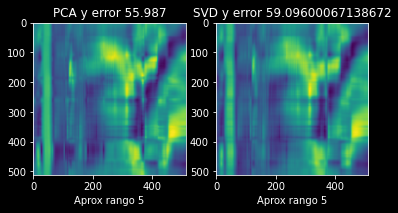

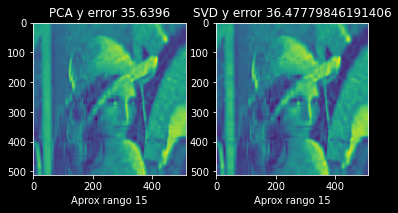

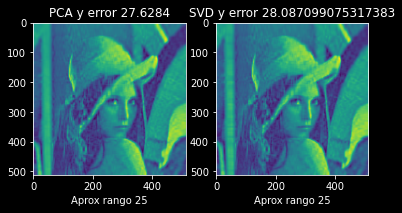

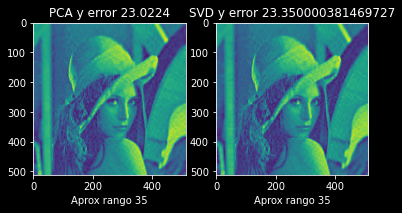

In [19]:
img = mpimg.imread('lena.png')
img = img[:, :, 1] # solo en verde
n = len(img)

mu = img.mean(axis=0).reshape(1, -1)
Uno = np.ones((n,1))
M = img - np.dot(Uno, mu)
C = (1/n) * np.dot(M.T, M)
u, s, vh = np.linalg.svd(img)
U, S, Vh = np.linalg.svd(C)


for k in range(5, 45, 10):
    V_k = Vh[:k, :].T
    U_k = np.dot(M, V_k)
    img_pca = np.dot(U_k, V_k.T) + np.dot(Uno, mu)
    img_trun_svd = u[:, :k] @ np.diag(s[:k]) @ vh[:k, :]


    fig, ax = plt.subplots(1,2)
    plt.subplot(121)
    plt.imshow(img_pca)
    plt.title("PCA y error {}".format(error(img, img_pca).round(4)))
    plt.xlabel("Aprox rango {}".format(k))
    plt.subplot(122)
    plt.imshow(img_trun_svd)
    plt.title("SVD y error {}".format(error(img, img_trun_svd).round(4)))
    plt.xlabel("Aprox rango {}".format(k))
    plt.show()


## Aplicación: Limpiar imágenes

Un hecho interesante sobre la reducción dimensional, es que a menudo reduce la cantidad de ruido en los datos.
Por ejemplo, una imagen con algún monto de ruido puede ser reconstruida con el SVD truncado.

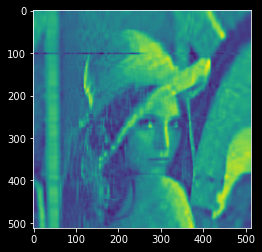

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('lena.png')
img.shape

img = img[:, :, 1] # solo en verde
plt.imshow(img)

noise = np.zeros_like(img)
img_copy = img.copy()
img_copy[100:104, :250] = 0.2 * np.random.rand(4, 250)
plt.imshow(img_copy)
u, s, vh = np.linalg.svd(img_copy)
u.shape
s.shape
vh.shape

k = 20
img_whited = u[:, :k] @ np.diag(s[:k]) @ vh[:k, :]
plt.imshow(img_whited)

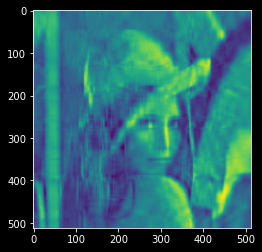

In [21]:
def condi(i,j):
    return 1 * (np.abs(i - j) <= 50)

diag_noise = np.array([[0.1 * condi(i,j) for j in range(512)] for i in range(512)])
new_img_copy = img.copy()
new_img_copy += diag_noise
plt.imshow(new_img_copy)

u, s, vh = np.linalg.svd(new_img_copy)
k = 15
img_whited = u[:, :k] @ np.diag(s[:k]) @ vh[:k, :]
plt.imshow(img_whited)

## Preprocesamiento y limpieza de atributos en ML

PCA es usado en principio para reducción dimensional. Luego se buscará normalizar la nueva representación de los datos, de tal manera
que la varianza en cada dirección transformada sea la misma.

Sea $V _{k } $ de orden $d\times k$ la matriz cuyas columnas son los $k$ vectores o direcciones principales obtenidas con PCA.
1) Halle la representación $k$-dimensional de los datos, así $U _{k } = D V _{k } $.

2) Divida cada columna de $U _{k } $ por su desviación estándar (proceso conocido como whitening).

Algoritmos como SGD trabajan mejor luego de el Preprocesamiento que se acaba de describir.

En aprendizaje no supervisado se pude usar el preprocesamiento descrito para detectar datos atípicos.
La práctica de los pasos anteriores, hace que se incremente la distancia absoluta de los datos atípicos hasta
la media en las direcciones de baja varianza, permitiendo descrubir datos atípicos no obvios.

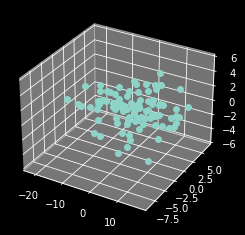

In [22]:
import numpy as np
import matplotlib.pyplot as plt

data = np.c_[9 * np.random.randn(100, 1), 3 * np.random.randn(100, 1), 1 * np.random.randn(100, 1)]
data[95:, 2] = [5,6, -5, -6, 5]
data[90:, :]

fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
plt.plot(data[:, 0], data[:, 1], data[:, 2], 'o')

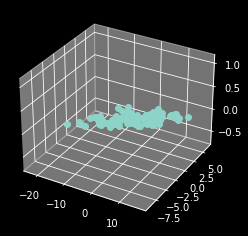

In [23]:
data_meaned = data - data.mean(axis=0)
u, s, vh = np.linalg.svd(data_meaned)
data_tr = u[:, :2] @ np.diag(s[:2]) @ vh[:2, :]
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
plt.plot(data_tr[:, 0], data_tr[:, 1], data_tr[:, 2], 'o')

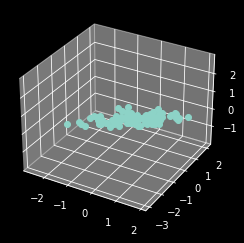

In [24]:
data_whited = data_tr / data_tr.std(axis=0)

fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
plt.plot(data_whited[:, 0], data_whited[:, 1], data_whited[:, 2], 'o')

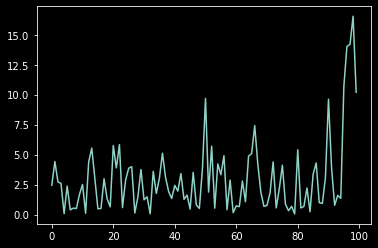

In [25]:
def maha(X):
    X_meaned = (X - data.mean(axis=0)).reshape(1, -1)
    C = np.cov(data.T)
    return np.dot(X_meaned, np.dot(np.linalg.inv(C), X_meaned.T))[0]

mahas = [maha(X) for X in data]
plt.plot(mahas)